# Dentate Gyrus neurogenesis

In [1]:
import scvelo as scv
import seaborn as sns
import numpy as np

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

## Read data

In [3]:
adata = scv.datasets.dentategyrus()
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [4]:
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.9 0.1]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

## Gene selection by detection, high variability, normalizing every cell by its initial size and logarithmizing X

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=5000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## Calculating RNA velocity

In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Plot

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_gyrus_umap_stream.svg


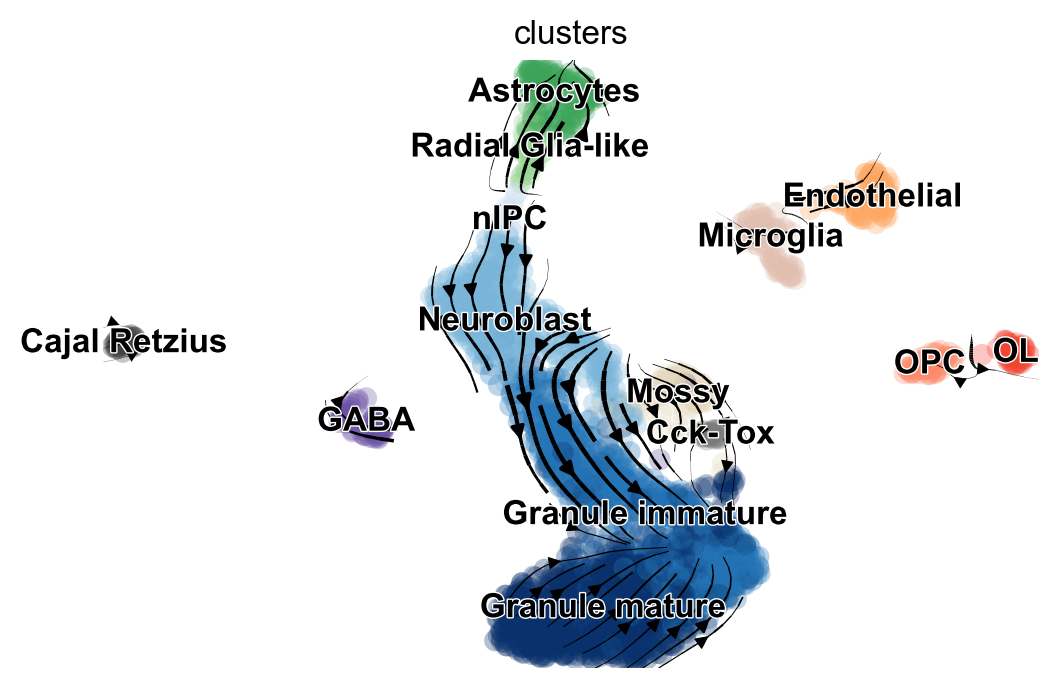

In [8]:
scv.pl.velocity_embedding_stream(adata, basis="umap", save="gyrus_umap_stream.svg")

saving figure to file ./figures/scvelo_gyrus_umap_vector.svg


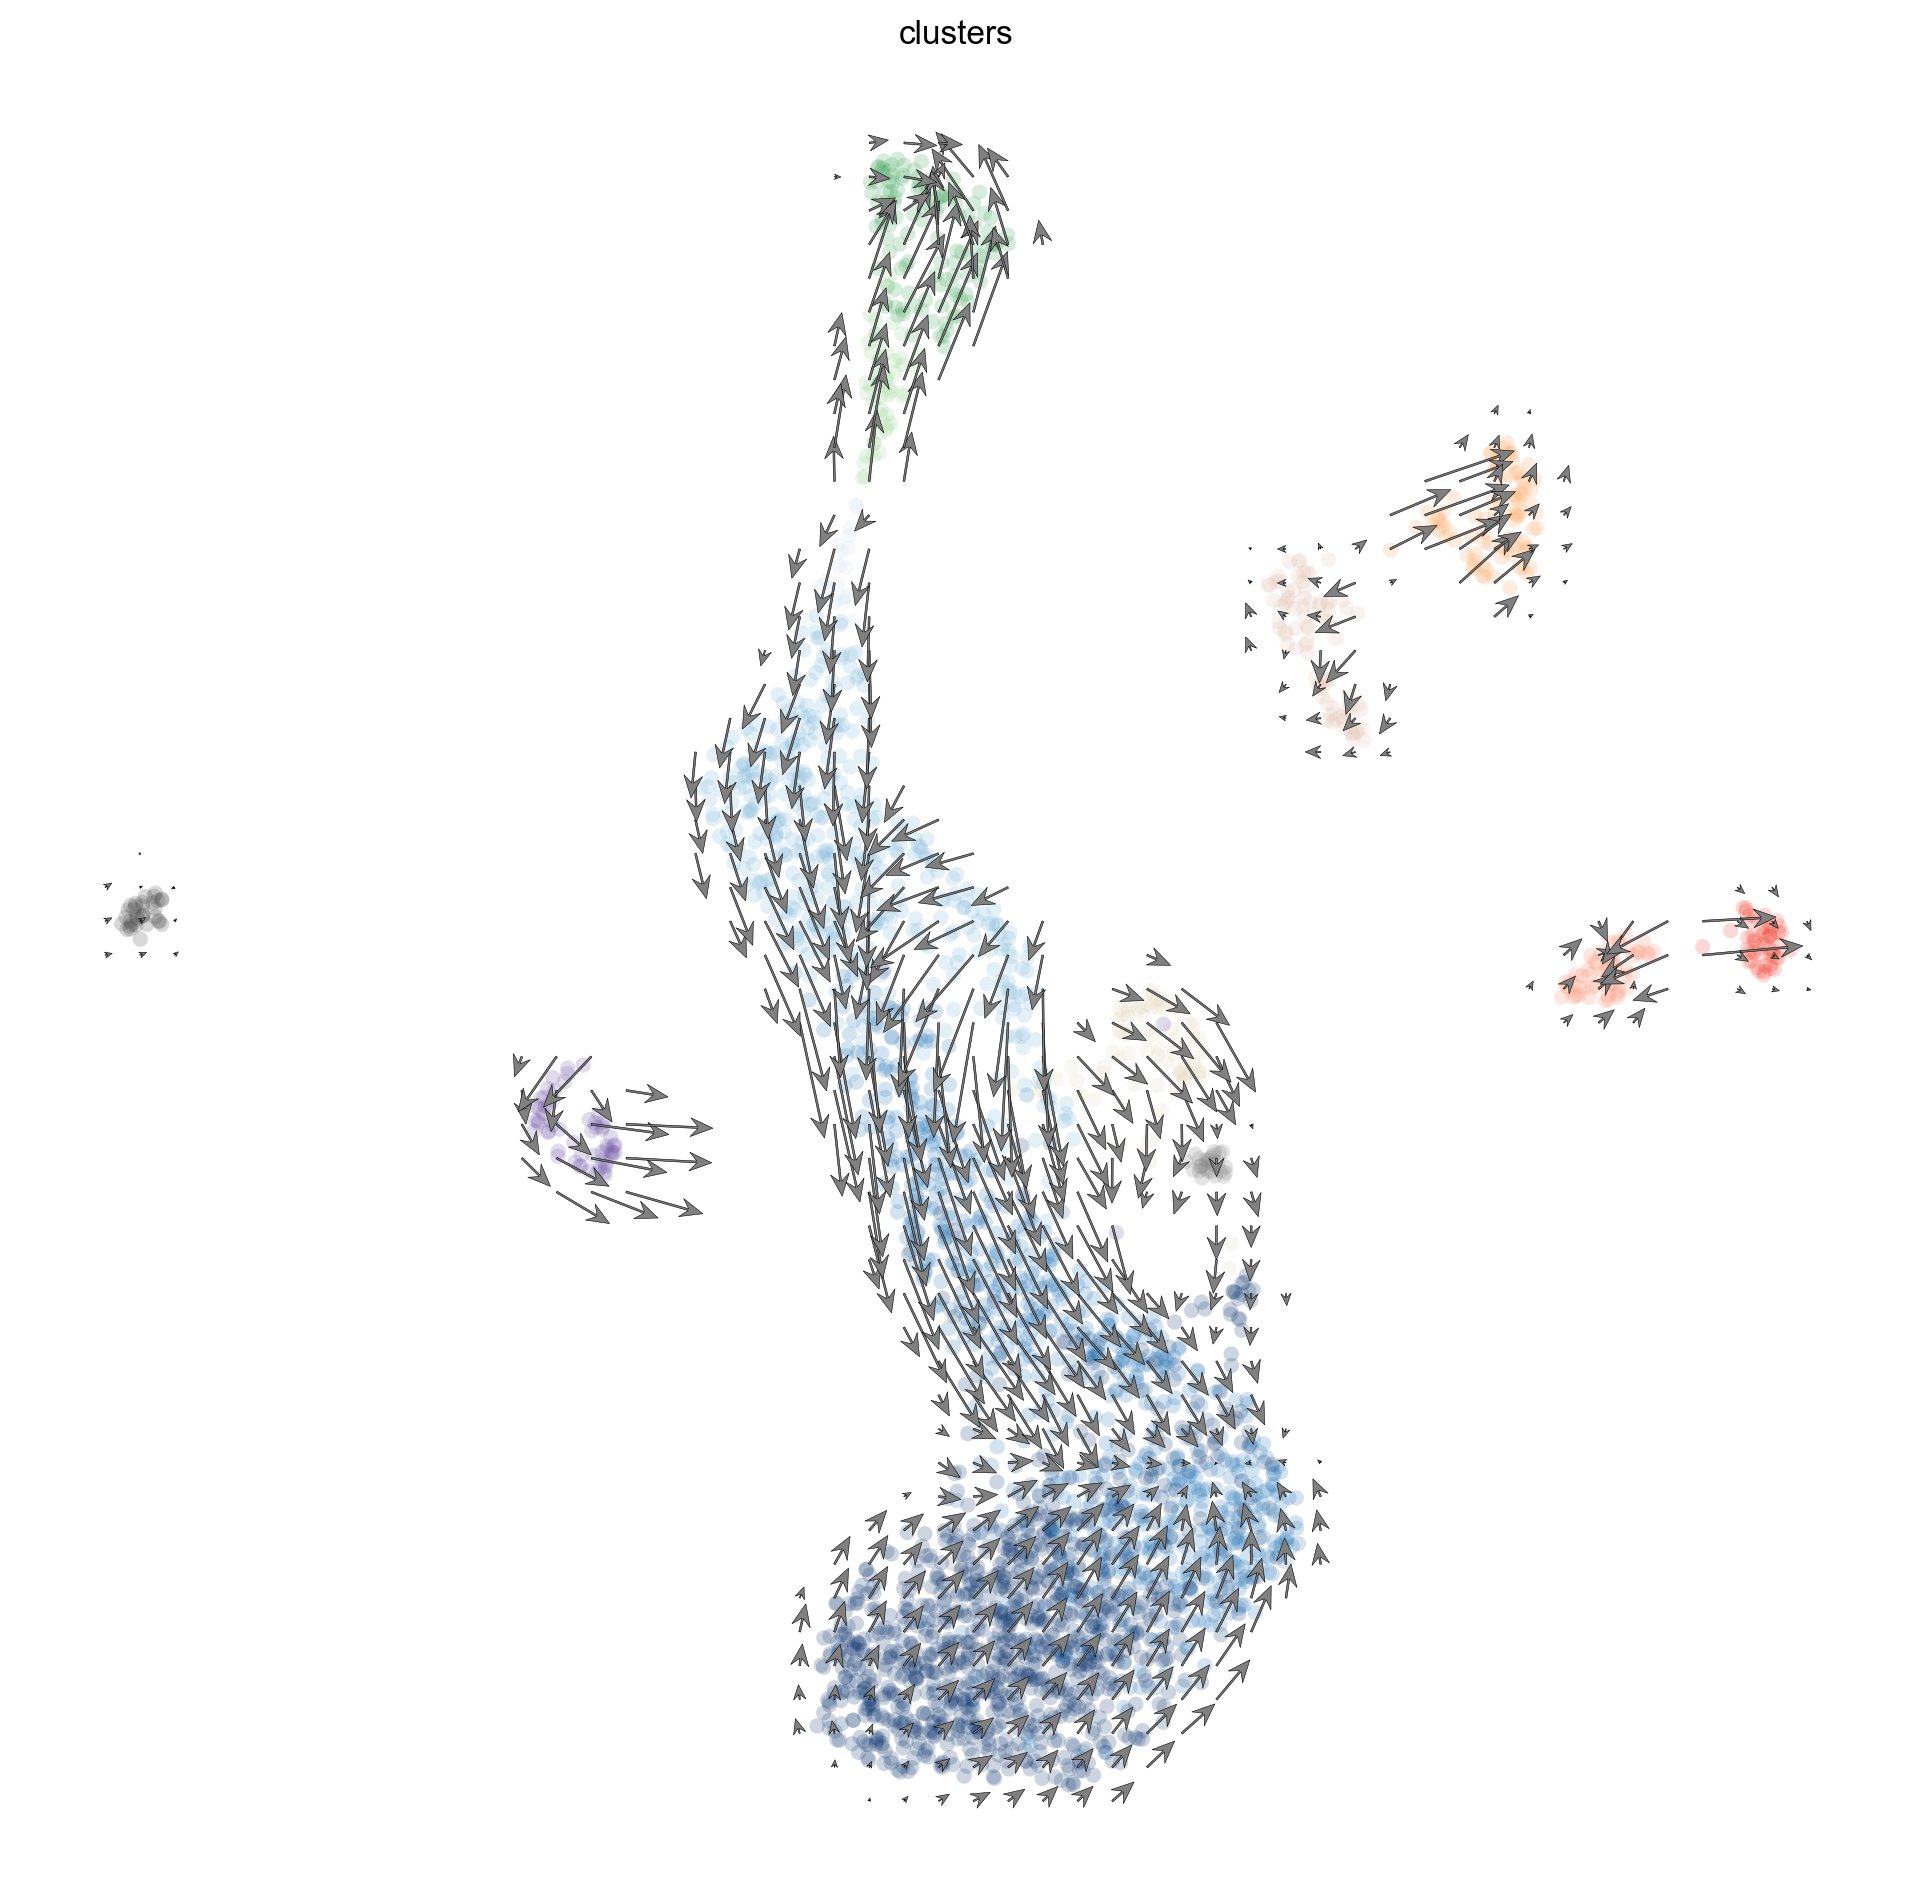

In [9]:
scv.pl.velocity_embedding_grid(adata, basis="umap", figsize=(12, 12), arrow_size=2, arrow_length=5, save="gyrus_umap_vector.svg")

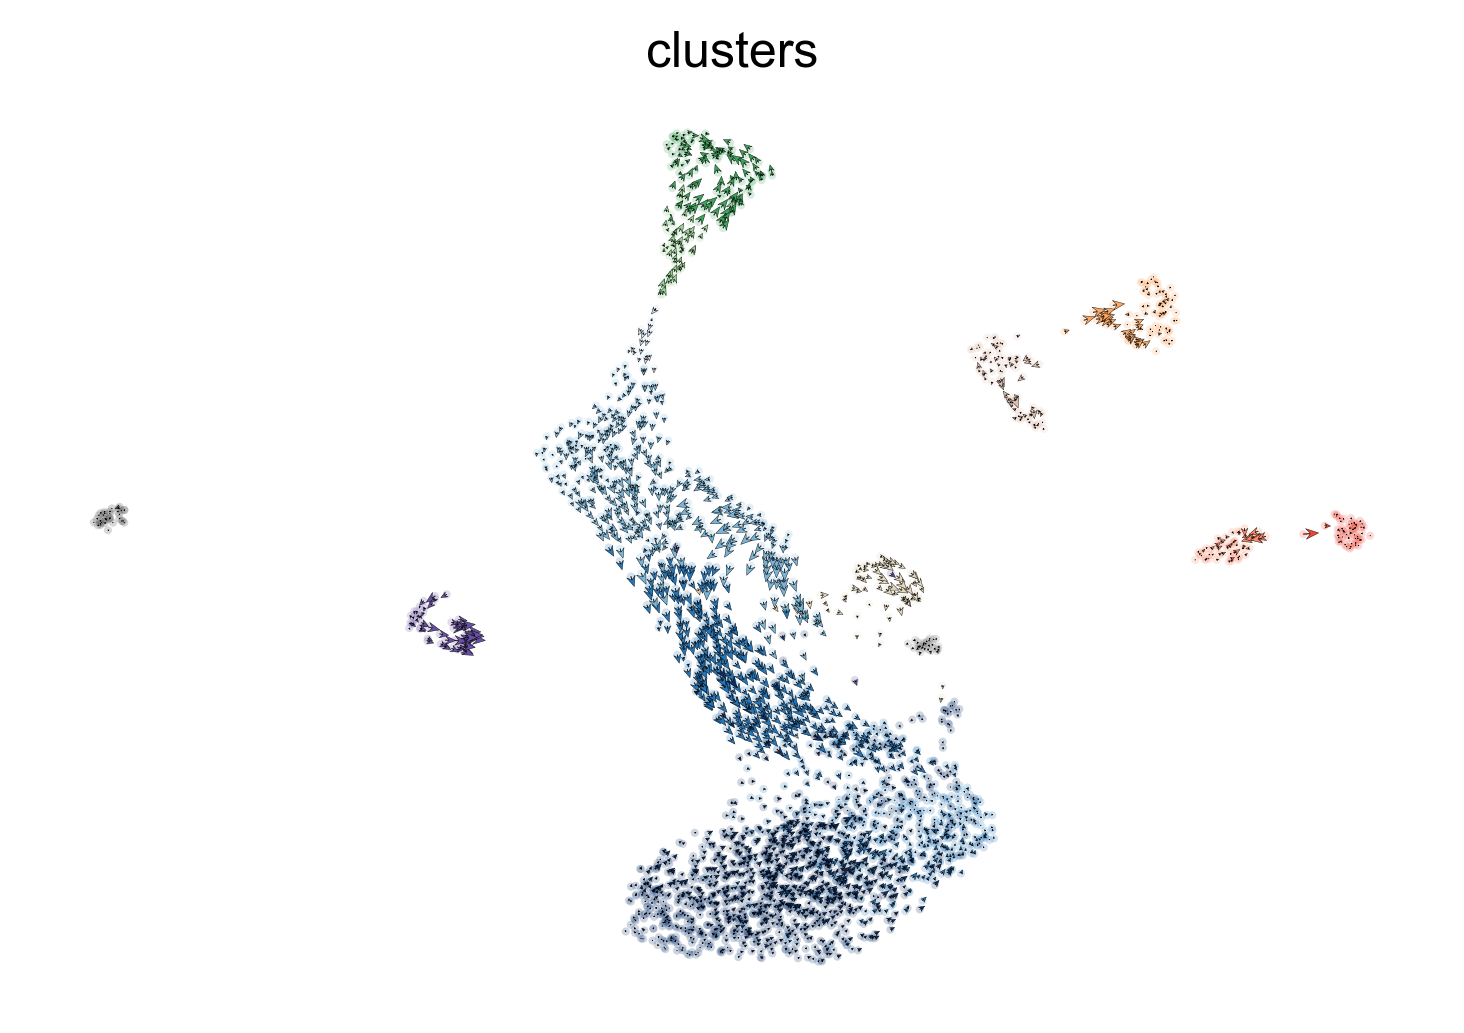

In [10]:
scv.pl.velocity_embedding(adata, basis='umap', arrow_length=2, arrow_size=1.5, dpi=150)

## Latent time

In [11]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/12 cores)
    finished (0:04:10) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [12]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [13]:
adata.layers["velocity"]

array([[        nan,         nan,         nan, ...,         nan,
         0.0089404 ,         nan],
       [        nan,         nan,         nan, ...,         nan,
         0.00628142,         nan],
       [        nan,         nan,         nan, ...,         nan,
        -0.        ,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
         0.00632677,         nan],
       [        nan,         nan,         nan, ...,         nan,
        -0.        ,         nan],
       [        nan,         nan,         nan, ...,         nan,
         0.01308133,         nan]])

## Plot latent time

In [14]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [15]:
adata.layers["velocity"]

array([[ 3.17794532e-02, -5.69760241e-03,  5.45949191e-02, ...,
         5.91871142e-03,  2.13257130e-03, -1.64459005e-01],
       [-5.37581742e-04,  8.09411258e-02,  1.20747387e-01, ...,
         0.00000000e+00,  0.00000000e+00, -3.27524543e-03],
       [ 1.14639439e-01,  3.75520438e-04, -7.67282769e-03, ...,
         1.59672216e-01,  0.00000000e+00,  3.01629305e-04],
       ...,
       [ 4.35986556e-02,  3.13749239e-02, -5.42549975e-02, ...,
         2.10298896e-02,  0.00000000e+00, -2.30168328e-01],
       [ 1.03166364e-01, -5.13663851e-02, -8.62507708e-03, ...,
         1.60760149e-01,  0.00000000e+00,  6.58659399e-01],
       [ 4.71515134e-02,  2.88139265e-02,  1.65745616e-03, ...,
        -3.57412547e-03,  6.42721727e-03, -3.19671690e-01]], dtype=float32)

computing terminal states
    identified 4 regions of root cells and 5 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_gyrus_latent_time.svg


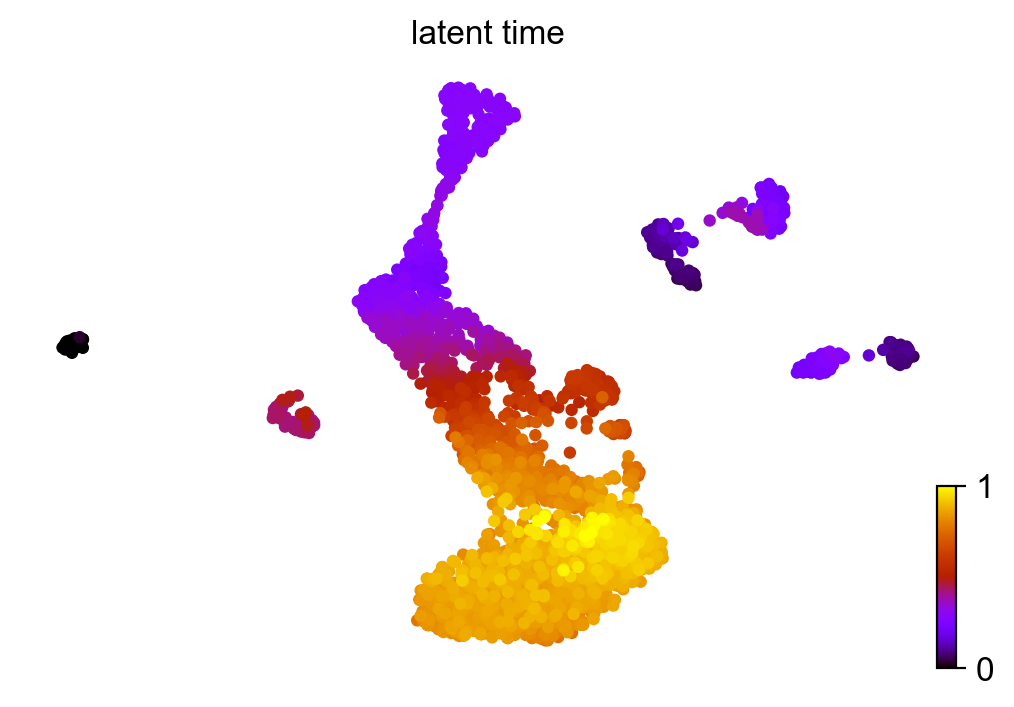

In [16]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, colorbar=True, save="gyrus_latent_time.svg")

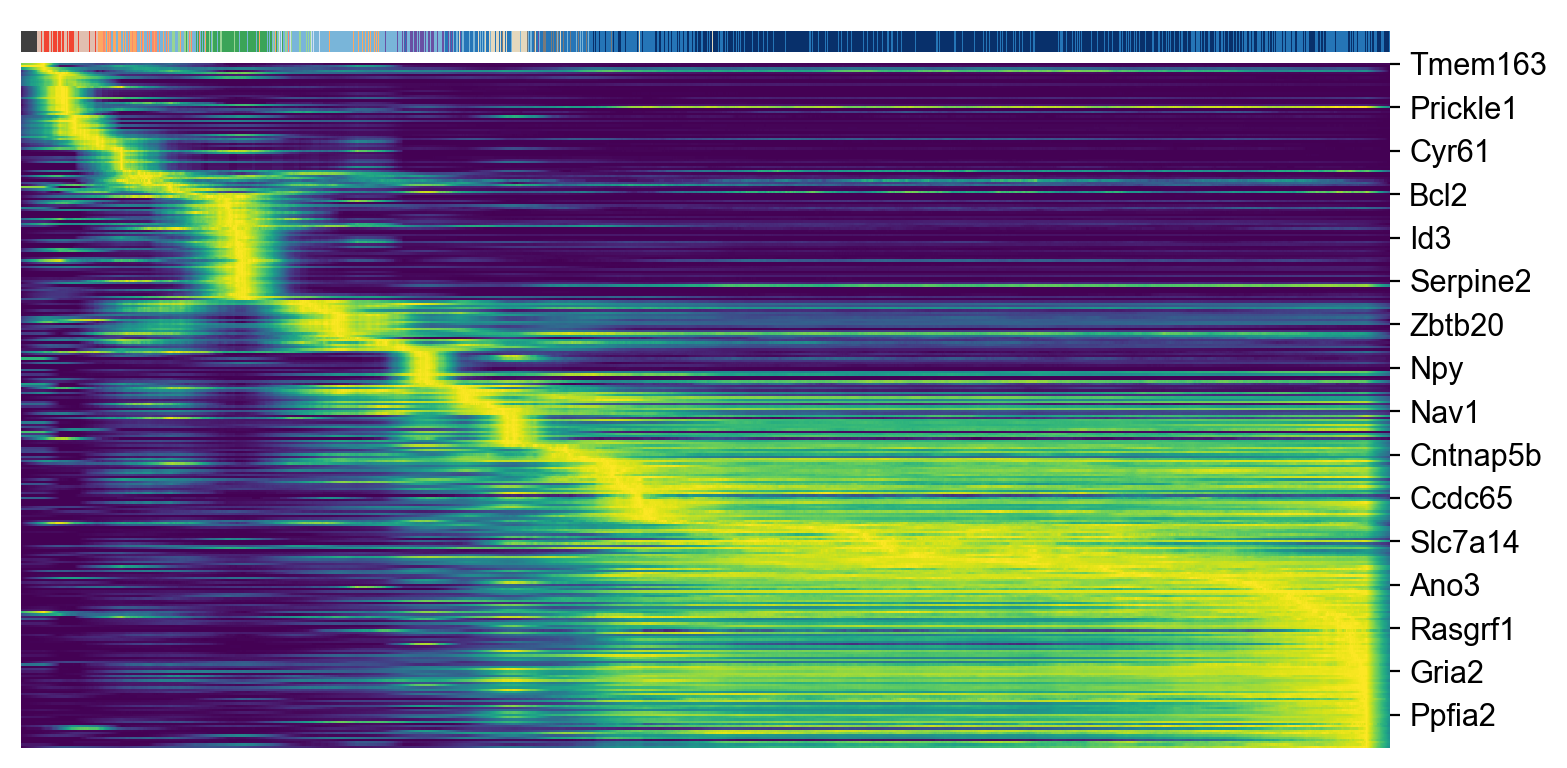

In [17]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100, col_color='clusters')

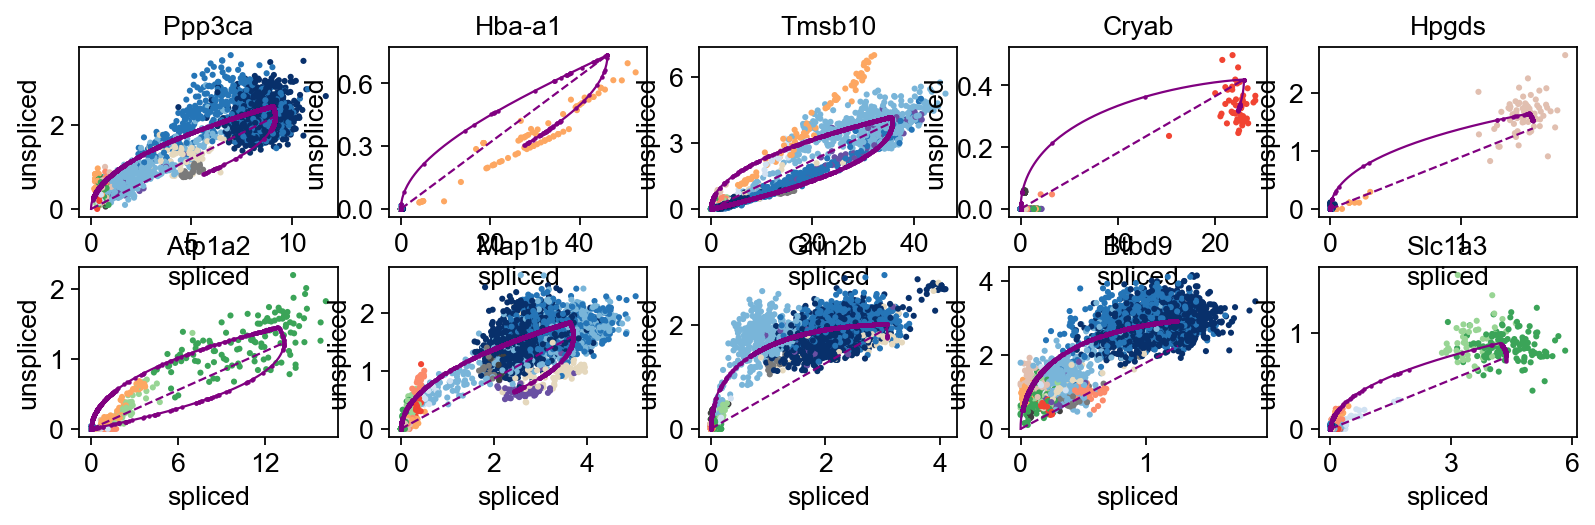

In [18]:
scv.pl.scatter(adata, basis=top_genes[:10], ncols=5)

## Fetch data

In [19]:
adata

AnnData object with n_obs × n_vars = 2930 × 3573
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2'
    uns: 'clusters_colors', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'recover_dynamics'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity_u'
    obsp: 'distances', 'connectivities'

In [20]:
adata.X

<2930x3573 sparse matrix of type '<class 'numpy.float32'>'
	with 2102127 stored elements in Compressed Sparse Row format>

In [21]:
adata.obs[["clusters", "root_cells", "end_points", "latent_time"]].to_csv("../../results/dentategyrus/obs.tsv", sep="\t")

In [22]:
adata.var[["fit_alpha", "fit_beta", "fit_gamma", "fit_t_", "fit_likelihood", "fit_u0", "fit_s0"]].to_csv("../../results/dentategyrus/genes.tsv", sep="\t")

In [23]:
adata.varm['loss']

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [777.13366573, 723.97965419, 719.47672833, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [24]:
adata.varm['loss'].shape

(3573, 22)

In [25]:
adata.layers["velocity"]

array([[ 3.17794532e-02, -5.69760241e-03,  5.45949191e-02, ...,
         5.91871142e-03,  2.13257130e-03, -1.64459005e-01],
       [-5.37581742e-04,  8.09411258e-02,  1.20747387e-01, ...,
         0.00000000e+00,  0.00000000e+00, -3.27524543e-03],
       [ 1.14639439e-01,  3.75520438e-04, -7.67282769e-03, ...,
         1.59672216e-01,  0.00000000e+00,  3.01629305e-04],
       ...,
       [ 4.35986556e-02,  3.13749239e-02, -5.42549975e-02, ...,
         2.10298896e-02,  0.00000000e+00, -2.30168328e-01],
       [ 1.03166364e-01, -5.13663851e-02, -8.62507708e-03, ...,
         1.60760149e-01,  0.00000000e+00,  6.58659399e-01],
       [ 4.71515134e-02,  2.88139265e-02,  1.65745616e-03, ...,
        -3.57412547e-03,  6.42721727e-03, -3.19671690e-01]], dtype=float32)

In [26]:
adata.layers["variance_velocity"]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00762959,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02885722,
        0.        ]], dtype=float32)

In [27]:
adata.layers["Ms"]

array([[0.06931353, 0.07097992, 0.29566148, ..., 0.0650735 , 0.02812999,
        0.25550523],
       [0.5809361 , 0.09053701, 0.34036243, ..., 0.        , 0.        ,
        0.11752369],
       [0.2488    , 0.0987646 , 0.167799  , ..., 0.        , 0.        ,
        0.06748623],
       ...,
       [0.02673992, 0.0546222 , 0.32818705, ..., 0.13080482, 0.        ,
        0.30059978],
       [0.05075603, 0.14892429, 0.03515352, ..., 0.        , 0.        ,
        0.37295768],
       [0.10640801, 0.07891862, 0.2966452 , ..., 0.05882746, 0.03323335,
        0.30641642]], dtype=float32)

In [28]:
import pandas as pd

In [29]:
pd.DataFrame(adata.layers["velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/velocity.tsv", sep="\t")

In [30]:
pd.DataFrame(adata.layers["variance_velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/variance_velocity.tsv", sep="\t")

In [31]:
pd.DataFrame(adata.layers["unspliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/unspliced.tsv", sep="\t")

In [32]:
adata.layers["unspliced"]

<2930x3573 sparse matrix of type '<class 'numpy.float32'>'
	with 582960 stored elements in Compressed Sparse Row format>

In [33]:
pd.DataFrame(adata.layers["spliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/spliced.tsv", sep="\t")

In [34]:
pd.DataFrame(adata.X.toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/gene_expr.tsv", sep="\t")

In [35]:
pd.DataFrame(adata.layers["velocity_u"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/velocity_u.tsv", sep="\t")

In [36]:
pd.DataFrame(adata.layers["Mu"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/Mu.tsv", sep="\t")

In [37]:
pd.DataFrame(adata.layers["Ms"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/dentategyrus/Ms.tsv", sep="\t")